<center>
    
<h2>BÀI TEST SỐ 1 </h2>
    
</center>
 
---
**Thông tin sinh viên:**
1. Họ tên SV: Đỗ Thị Minh Huyền
2. Mã Sinh viên: 2121051221
3. Lớp: DCCTCT66_07C
4. Nhóm môn học: 7080510_KHMT65B_04

---



# A. Mô tả tập dữ liệu
Tập dữ liệu Data_Diabetes.csv bao gồm kết quả xét nghiệm bệnh tiểu đường của 723
bệnh nhân toàn bộ là nữ giới. Mỗi bản ghi tương ứng với một bệnh nhân, bao gồm 9 thuộc 
tính:
1. Pregnancies: Số lần mang thai
2. Glucose: Chỉ số Gluco 
3. BloodPressur: Huyết áp (đơn vị: mm Hg)
4. SkinThickness: Mức độ dày da (đơn vị: mm)
5. Insulin: Chỉ số Insulin (đơn vị: mu U/ml)
6. BMI: Chỉ số BMI của cơ thể (được tính bằng = Cân nặng / chiều cao2
)
7. DiabetesPedigreeFunction: Chức năng phả hệ của bệnh tiểu đường
8. Age: Tuổi
9. Outcome: Thuộc tính cho biết bệnh nhân có mắc bệnh tiểu đường hay không?
    * Không bị tiểu đường (0)
    * Bị tiểu đường (1)

# B. Yêu cầu

## 1. Đọc file dữ liệu, quan sát dữ liệu và các đặc trưng thống kê của tập dữ liệu

In [1]:
#Gọi các thư viện sử dụng
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#-----------
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning) 

# Đọc tập dữ liệu
df_data = pd.read_csv('Data_Diabetes.csv')

# Hiển thị thông tin của biến
df_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               723 non-null    int64  
 1   Glucose                   723 non-null    int64  
 2   BloodPressure             723 non-null    int64  
 3   SkinThickness             723 non-null    float64
 4   Insulin                   723 non-null    float64
 5   BMI                       723 non-null    float64
 6   DiabetesPedigreeFunction  723 non-null    float64
 7   Age                       723 non-null    int64  
 8   Outcome                   723 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 51.0 KB


In [2]:
# Hiển thị 5 bản ghi đầu
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,126.0,33.6,0.627,50,1
1,1,85,66,29.0,126.0,26.6,0.351,31,0
2,8,183,64,29.0,126.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [3]:
# Hiển thị 5 bản ghi cuối
df_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
718,10,101,76,48.0,180.0,32.9,0.171,63,0
719,2,122,70,27.0,126.0,36.8,0.340,27,0
720,5,121,72,23.0,112.0,26.2,0.245,30,0
721,1,126,60,29.0,126.0,30.1,0.349,47,1
722,1,93,70,31.0,126.0,30.4,0.315,23,0


In [4]:
# Hiển thị 5 bản ghi 
df_data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
671,3,173,78,39.0,185.0,33.8,0.970,31,1
459,8,194,80,29.0,126.0,26.1,0.551,67,0
416,8,108,70,29.0,126.0,30.5,0.955,33,1
405,3,89,74,16.0,85.0,30.4,0.551,38,0
434,8,74,70,40.0,49.0,35.3,0.705,39,0


In [5]:
# Kiểm tra các bản ghi bị trùng lặp
print('Số lượng các bản ghi trùng lặp:',df_data.duplicated().sum())

Số lượng các bản ghi trùng lặp: 0


In [6]:
# Kiểm tra dữ liệu missing
print('Kiểm tra dữ liệu missing:\n', df_data.isnull().sum())

Kiểm tra dữ liệu missing:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Thống kê dữ liệu thuộc tính số
df_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.869986,121.928077,72.467497,29.147994,142.435685,32.473582,0.474649,33.367911,0.344398
std,3.363438,30.746940,12.256605,9.017616,88.624795,6.891518,0.332530,11.764549,0.475501
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,119.500000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,131.000000,36.600000,0.628000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    474
1    249
Name: Outcome, dtype: int64


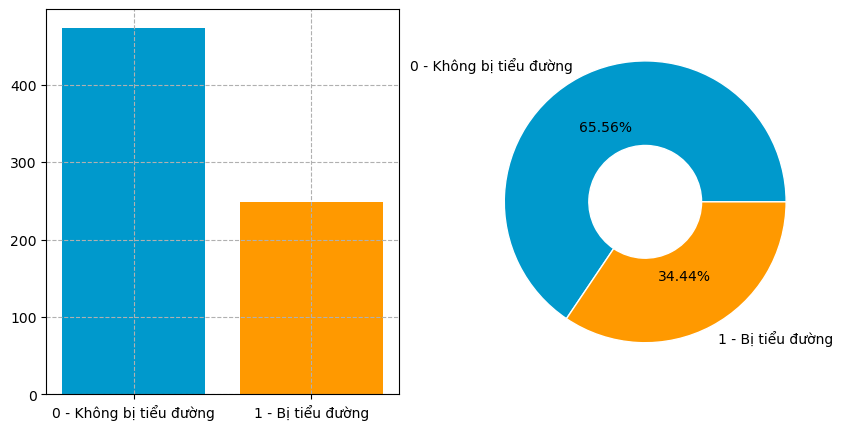

In [8]:
# Thống kế dữ liệu bệnh nhân không bị và bị tiểu đường
kq_outcome = df_data['Outcome'].value_counts()
print(kq_outcome)
lb = ['0 - Không bị tiểu đường', '1 - Bị tiểu đường']

plt.figure(figsize=(10,5))

# Vẽ biểu đồ cột thể hiện số lượng bệnh nhân không bị và bị tiểu đường
plt.subplot(1,2,1)
plt.bar(lb, kq_outcome.values, color=['#0099CC','#FF9900'])
plt.grid(ls = '--')

# Vẽ biểu đồ tròn thể hiện tỉ lệ bệnh nhân không bị và bị tiểu đường
plt.subplot(1,2,2)
plt.pie(kq_outcome, labels=lb, colors=['#0099CC','#FF9900'], 
       autopct='%.2f%%', wedgeprops=dict(width=0.6,edgecolor='w'))

plt.show()

### NHẬN XÉT: Tập dữ liệu bị mất cân bằng nhẹ giữa 2 lớp đầu ra
* Lớp 0 - Bệnh nhân không bị tiểu đường khoảng 65.6%
* Lớp 1 - Bệnh nhân bị tiểu đường khoảng 34.4%

**Dữ liệu mất cân bằng nhẹ --> Cần phải xử lý cân bằng dữ liệu**

---

## 2. Đánh giá mức độ cân bằng và thực hiện cân bằng dữ liệu

In [9]:
# Thống kê số lượng đầu ra theo từng mẫu
check = df_data['Outcome'].value_counts()
check

0    474
1    249
Name: Outcome, dtype: int64

In [10]:
import imblearn
print(imblearn.__version__)

0.12.2


In [11]:
# Tách biến X, y
df = df_data.copy()

X = df.iloc[:,:8]
y = df.iloc[:,-1]
counter = Counter(y)

print('Biến độc lập X:\n', X)
print('Biến phụ thuộc y:\n', y)

Biến độc lập X:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72           35.0    126.0  33.6   
1              1       85             66           29.0    126.0  26.6   
2              8      183             64           29.0    126.0  23.3   
3              1       89             66           23.0     94.0  28.1   
4              0      137             40           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
718           10      101             76           48.0    180.0  32.9   
719            2      122             70           27.0    126.0  36.8   
720            5      121             72           23.0    112.0  26.2   
721            1      126             60           29.0    126.0  30.1   
722            1       93             70           31.0    126.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                   

In [12]:
blue_patch = mpatches.Patch(color='#1E77B4',hatch='o', label='Lớp 0: Không bị tiểu đường')
orange_patch = mpatches.Patch(color='#FF7F0F',hatch='o', label='Lớp 1: Bị tiểu đường')

In [13]:
# # Sử dụng Phương pháp SMOTE để sinh thêm mẫu cho tập thiểu số
# from imblearn.over_sampling import SMOTE
# # Tham số sampling_strategy thiết lập tỷ lệ tạo mẫu của tập thiểu số với tập đa số
# # Tham số k_neighbors thiết lập số mẫu láng giềng gần nhất sử dụng để sinh mẫu
# oversample = SMOTE(sampling_strategy=0.9, 
#                    k_neighbors=8)
# X_smote, y_smote = oversample.fit_resample(X, y)

# counter_smote = Counter(y_smote)
# print(counter_smote)

In [14]:
# Phương pháp kết hợp giữa Over và Under sampling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#Sử dụng phương pháp SMOTE để sinh thêm mẫu trong lớp thiểu số theo tỷ lệ 0.5:1
#Sử dụng phương pháp Random Under Sampling để loại bỏ ngẫu nhiên số mẫu trong lớp đa số theo tỷ lệ 1:0.8

over = RandomOverSampler(sampling_strategy=0.9)
under = RandomUnderSampler()
steps = [('over', over), 
         ('under', under)]
pipeline = Pipeline(steps=steps)
X_hybrid,y_hybrid = pipeline.fit_resample(X,y)


counter_hybrid = Counter(y_hybrid)
print(counter_hybrid)

Counter({0: 426, 1: 426})


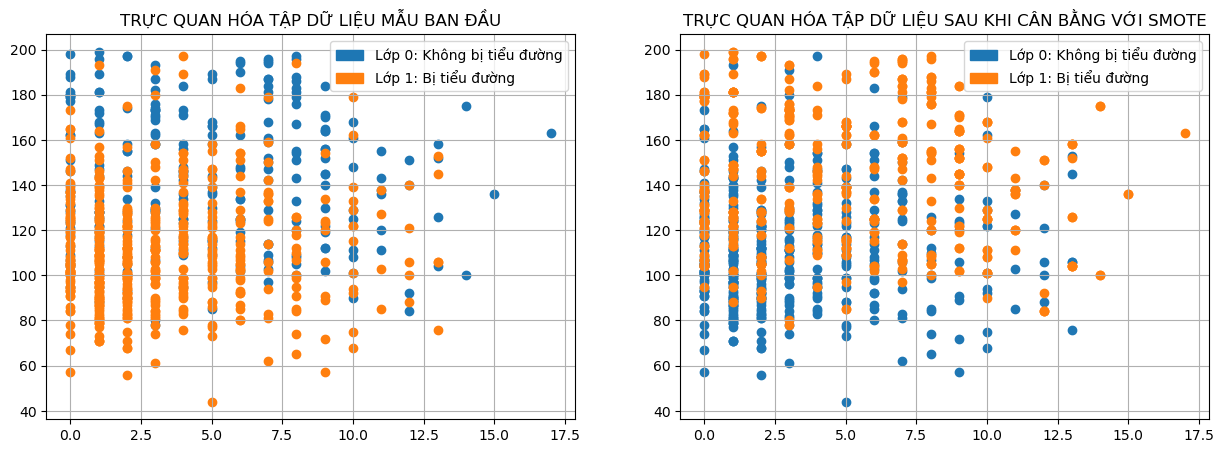

In [15]:
plt.figure(figsize=[15,5])
# Biểu đồ mẫu ban đầu
plt.subplot(1,2,1)
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU MẪU BAN ĐẦU')

# Biểu đồ sau khi cân bằng với smote
plt.subplot(1,2,2)
for label, _ in counter_hybrid.items():
    row_ix = np.where(y_hybrid == label)[0]
    plt.scatter(X_hybrid.iloc[row_ix, 0], X_hybrid.iloc[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI SMOTE')

plt.show()


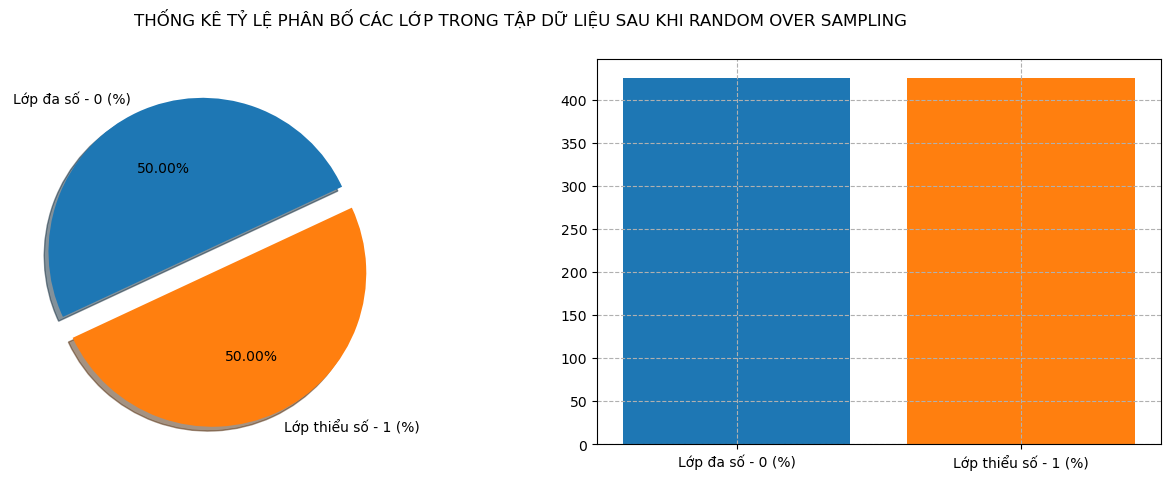

In [16]:
# Lấy danh sách các giá trị từ đối tượng Counter theo thứ tự các khóa 0 - 1
class_y = [counter_hybrid[key] for key in sorted(counter_hybrid)]

# Định nghĩa nhãn cho biểu đồ
labels = ["Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"]

# Trực quan hóa dữ liệu mỗi lớp trong tập dữ liệu sau cân bằng
plt.figure(figsize=(16, 5))

# Biểu đồ tròn thể hiện tỷ lệ & số lượng mẫu theo từng lớp
plt.subplot(1, 2, 1)
plt.pie(class_y, explode=[0, 0.15], autopct='%1.2f%%', shadow=True, labels=labels, startangle=25, colors=['#1E77B4', '#FF7F0F'])

# Biểu đồ cột thể hiện tổng số lượng mẫu theo từng lớp
plt.subplot(1, 2, 2)
plt.bar(labels, class_y, color=['#1E77B4', '#FF7F0F'])
plt.grid(ls='--')
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI RANDOM OVER SAMPLING', fontsize=12)
plt.show()


## 3. Phân tách các biến Độc lập (X) - Phụ thuộc (Y) tương ứng
* Biến Độc lập X - 8 thuộc tính: 
    * Pregnancies	
    * Glucose	
    * BloodPressure	
    * SkinThickness	
    * Insulin	
    * BMI	
    * DiabetesPedigreeFunction	
    * Age	
* Biến phụ thuộc y - 1 thuộc tính: 
    * Outcome

In [17]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
66,5,139,64,35.0,140.0,28.6,0.411,26,0
479,0,139,62,17.0,210.0,22.1,0.207,21,0
117,1,88,30,42.0,99.0,55.0,0.496,26,1
279,6,151,62,31.0,120.0,35.5,0.692,28,0
677,1,149,68,29.0,127.0,29.3,0.349,42,1


**Nhận xét:** Dữ liệu đã được chuẩn hóa => Có thể sử dụng để train dữ liệu

In [18]:
print('Biến độc lập X\n', X_hybrid)

Biến độc lập X
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
283            8      112             72           29.0    126.0  23.6   
495            0      117             66           31.0    188.0  30.8   
531            1       99             72           30.0     18.0  38.6   
89             1       71             48           18.0     76.0  20.4   
547           12      121             78           17.0    126.0  26.5   
..           ...      ...            ...            ...      ...   ...   
895            5      166             76           29.0    126.0  45.7   
896            5      139             80           35.0    160.0  31.6   
897            0      137             40           35.0    168.0  43.1   
898            9      164             84           21.0    126.0  30.8   
899            5      112             66           29.0    126.0  37.8   

     DiabetesPedigreeFunction  Age  
283                     0.840   58  
495                  

In [19]:
print('Biến phụ thuộc y\n', y_hybrid)

Biến phụ thuộc y
 283    0
495    0
531    0
89     0
547    0
      ..
895    1
896    1
897    1
898    1
899    1
Name: Outcome, Length: 852, dtype: int64


## 4. Chia tập dữ liệu thành 2 phần Train - Test

In [20]:
# Gọi hàm tách dữ liệu train_test_split trong thư sklearn_model_section:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_hybrid, y_hybrid, 
                                                   train_size= 0.8,
                                                   shuffle=True)

print('Tổng số mẫu trong tập dữ liệu: ', len(y_hybrid))
print('Số mẫu trong tập train: ', len(y_train))
print('Số mẫu trong tập test: ', len(y_test))

Tổng số mẫu trong tập dữ liệu:  852
Số mẫu trong tập train:  681
Số mẫu trong tập test:  171


In [21]:
# Hiển thị dữ liệu tập Train
print(X_train.shape)
print(X_train)
print('-----------------------------------')
print(y_train.shape)
print(y_train)

(681, 8)
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
328            4       92             80           29.0    126.0  42.2   
656            4      118             70           29.0    126.0  44.5   
449            8      126             74           38.0     75.0  25.9   
625            4      145             82           18.0    126.0  32.5   
263            2      108             62           10.0    278.0  25.3   
..           ...      ...            ...            ...      ...   ...   
21            11      143             94           33.0    146.0  36.6   
705            4      136             70           29.0    126.0  31.2   
813            1      181             64           30.0    180.0  34.1   
77             2      110             74           29.0    125.0  32.4   
110            4       97             60           23.0    126.0  28.2   

     DiabetesPedigreeFunction  Age  
328                     0.237   29  
656                     0.90

##  5. Sinh viên sử dụng một trong số các thuật toán đã được học:
kNN, Decision Tree, Naïve  bayes để huấn luyện và đánh giá độ chính xác của mô hình; Tùy chỉnh các tham số của mô hình để đạt được độ chính xác cao nhất.

a) Độ chính xác của model (accuracy) trên tập Train – Test

b) Tổng số mẫu dự đoán đúng - sai trên tập Test

c) Ma trận confusion matrix trên tập Test

d) Tìm hiểu và tính toán thông số F1-Score, Recall của model 

### MÔ HÌNH THUẬT TOÁN KNN

In [22]:
# Gọi thư viện thuật toán KNN
from sklearn.neighbors import KNeighborsClassifier

# Khai báo model KNN sử dụng các tham số mặc định
KNN_diabetes = KNeighborsClassifier(n_neighbors=5)
# Hiển thị danh sách tham số
KNN_diabetes.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [23]:
# Thực hiện huấn luyện mô hình với tập dữ liệu Train:
KNN_diabetes.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
# Import module accuracy_score của thư viện sklearn.metrics để đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

#### <span style="color: red;">a) Độ chính xác của model (accuracy) trên tập Train – Test</span>

* Đánh giá độ chính xác của mô hình trên tập Train

In [25]:
acc_train_KNN_1 = KNN_diabetes.score(X_train, y_train)
print('Độ chính xác của mô hình trên tập Huấn luyện:', acc_train_KNN_1)
print('Độ chính xác của mô hình trên tập Huấn luyện (%):', round(acc_train_KNN_1*100,2))

Độ chính xác của mô hình trên tập Huấn luyện: 0.8061674008810573
Độ chính xác của mô hình trên tập Huấn luyện (%): 80.62


* Đánh giá độ chính xác của mô hình trên tập Test

In [26]:
# Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test:
y_pred_KNN_1 = KNN_diabetes.predict(X_test)

# Kết quả dự đoán của mô hình trên tập Test:
print(y_pred_KNN_1.shape)
print(y_pred_KNN_1)

(171,)
[0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1
 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0]


In [27]:
# Độ chính xác của mô hình trên tập Test:
acc_test_KNN_1 = accuracy_score(y_test, y_pred_KNN_1, normalize=True)

print('Độ chính xác của mô hình trên tập Test: ', acc_test_KNN_1)
print('Độ chính xác của mô hình trên tập Test (%):', round(acc_test_KNN_1*100, 2))

Độ chính xác của mô hình trên tập Test:  0.6549707602339181
Độ chính xác của mô hình trên tập Test (%): 65.5


#### <span style="color: red;"> b) Tổng số mẫu dự đoán đúng - sai trên tập Test</span>

In [28]:
# Đếm số mẫu dự đoán đúng trên tập Test:
acc_test_KNN_1 = accuracy_score(y_test, y_pred_KNN_1, normalize=False)

print('Tổng số mẫu dự đoán đúng: ', int(acc_test_KNN_1), '/', len(y_test))
print('Tổng số mẫu dự đoán sai:', int(len(y_test) - acc_test_KNN_1), '/', len(y_test))

Tổng số mẫu dự đoán đúng:  112 / 171
Tổng số mẫu dự đoán sai: 59 / 171


#### <span style="color: red;">c) Ma trận Confusion matrix trên tập Test</span>

[[57 31]
 [28 55]]


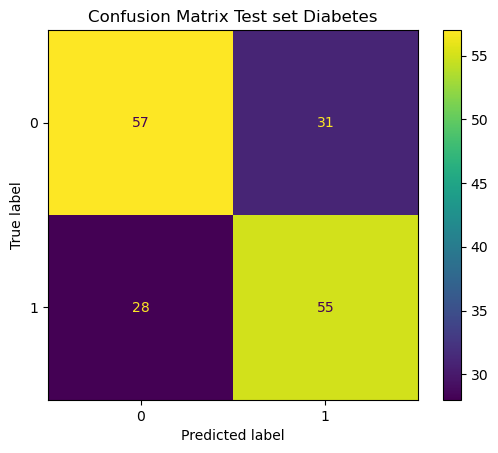

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tính ma trận confusion matrix
cnf_matrix_diabetes = confusion_matrix(y_test, y_pred_KNN_1)
print(cnf_matrix_diabetes)

# Hiển thị ma trận
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNN_1)
plt.title('Confusion Matrix Test set Diabetes')
plt.show()

**NHẬN XÉT:**

- Train: 82% -- Test: 73% : Độ chính xác của Mô hình ở trạng thái Overfitting 
--> Cần nâng cao độ chính xác

**Thay đổi tham số mô hình để tìm ra tham số tối ưu nhất:**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_n_neighbors = 0
best_weights = 0

for i in range(5, 20, 2):
    for weights in ['uniform', 'distance']:
        # Khai báo mô hình mới bằng cách thay đổi tham số n_neighbors và weights
        KNN_diabetes = KNeighborsClassifier(n_neighbors=i, weights=weights)
        
        # Thực hiện huấn luyện với dữ liệu tập Train
        KNN_diabetes.fit(X_train, y_train)
        
        # Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
        y_pred_KNN_2 = KNN_diabetes.predict(X_test)
        
        # Tính độ chính xác %
        acc_test_KNN_2 = accuracy_score(y_test, y_pred_KNN_2)
        print(f"Độ chính xác với n_neighbors={i} và weights={weights}: {acc_test_KNN_2}")
        
        # Kiểm tra nếu acc_test_KNN_2 lớn hơn acc_test_KNN_2 lớn nhất đã ghi nhận trước đó
        if acc_test_KNN_2 > max_accuracy:
            max_accuracy = acc_test_KNN_2
            best_n_neighbors = i
            best_weights = weights
    
# In ra giá trị của i tương ứng với acc_test lớn nhất
print("Tham số có độ chính xác cao nhất:\n", 'n_neighbor = ', best_n_neighbors, '\nweights = ', best_weights)


Độ chính xác với n_neighbors=5 và weights=uniform: 0.6549707602339181
Độ chính xác với n_neighbors=5 và weights=distance: 0.7543859649122807
Độ chính xác với n_neighbors=7 và weights=uniform: 0.6842105263157895
Độ chính xác với n_neighbors=7 và weights=distance: 0.7485380116959064
Độ chính xác với n_neighbors=9 và weights=uniform: 0.6549707602339181
Độ chính xác với n_neighbors=9 và weights=distance: 0.7426900584795322
Độ chính xác với n_neighbors=11 và weights=uniform: 0.6666666666666666
Độ chính xác với n_neighbors=11 và weights=distance: 0.7485380116959064
Độ chính xác với n_neighbors=13 và weights=uniform: 0.6666666666666666
Độ chính xác với n_neighbors=13 và weights=distance: 0.7543859649122807
Độ chính xác với n_neighbors=15 và weights=uniform: 0.6608187134502924
Độ chính xác với n_neighbors=15 và weights=distance: 0.7543859649122807
Độ chính xác với n_neighbors=17 và weights=uniform: 0.6900584795321637
Độ chính xác với n_neighbors=17 và weights=distance: 0.7660818713450293
Độ ch

**Xây dựng mô hình dự đoán kNN với các tham số vừa tìm được**

In [31]:
KNN_diabetes = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights)

In [32]:
KNN_diabetes.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19, weights='distance')

#### <span style="color: red;">Độ chính xác của model (accuracy) trên tập Train – Test</span>

In [33]:
# Độ chính xác của Model trên tập Huấn luyện
acc_train_KNN_2 = KNN_diabetes.score(X_train, y_train)
print('Độ chính xác của mô hình trên tập Huấn luyện:', acc_train_KNN_2)
print('Độ chính xác của mô hình trên tập Huấn luyện (%):', round(acc_train_KNN_2*100,2))


Độ chính xác của mô hình trên tập Huấn luyện: 1.0
Độ chính xác của mô hình trên tập Huấn luyện (%): 100.0


In [34]:
# Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test:
y_pred_KK_2 = KNN_diabetes.predict(X_test)

# Độ chính xác của mô hình trên tập Test:
acc_test_KNN_2 = accuracy_score(y_test, y_pred_KNN_2, normalize=True)

print('Độ chính xác của mô hình trên tập Test: ', acc_test_KNN_2)
print('Độ chính xác của mô hình trên tập Test (%):', round(acc_test_KNN_2*100, 2))

Độ chính xác của mô hình trên tập Test:  0.7719298245614035
Độ chính xác của mô hình trên tập Test (%): 77.19


#### <span style="color: red;">Tổng số mẫu dự đoán đúng - sai trên tập Test </span>

In [35]:
# Đếm số mẫu dự đoán đúng trên tập Test:
acc_test_KNN_2 = accuracy_score(y_test, y_pred_KNN_2, normalize=False)

print('Tổng số mẫu dự đoán đúng: ', int(acc_test_KNN_2), '/', len(y_test))
print('Tổng số mẫu dự đoán sai:', int(len(y_test) - acc_test_KNN_2), '/', len(y_test))

Tổng số mẫu dự đoán đúng:  132 / 171
Tổng số mẫu dự đoán sai: 39 / 171


#### <span style="color: red;">Ma trận confusion matrix trên tập Test</span>

[[59 29]
 [10 73]]


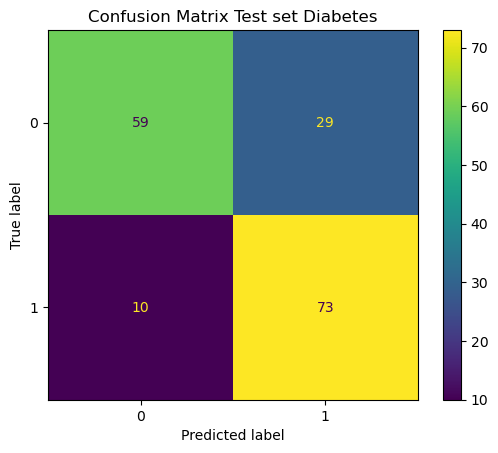

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tính ma trận confusion matrix
cnf_matrix_diabetes = confusion_matrix(y_test, y_pred_KNN_2)
print(cnf_matrix_diabetes)

# Hiển thị ma trận
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNN_2)
plt.title('Confusion Matrix Test set Diabetes')
plt.show()

### NHẬN XÉT:
---
* Sau khi thay đổi các tham số của mô hình để tìm các tham số tối ưu nhất cho mô hình có Train - Test: 100 - 79.53 (%)
=> Độ chính xác sau khi Test vẫn chưa đủ để đưa vào sử dụng 
=> <strong>Sử dụng mô hình khác để Huấn luyện </strong>

### MÔ HÌNH THUẬT TOÁN DECISION TREE

In [37]:
# Gọi thư viện thuật toán DecisionTreeClasifier
from sklearn.tree import DecisionTreeClassifier

# Khai báo mô hình
Tree = DecisionTreeClassifier()

# Liệt kê danh sách tham số:
Tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
# Huấn luyện mô hình với tập dữ liệu huấn luyện:
Tree.fit(X_train, y_train)

DecisionTreeClassifier()

['Pregnancies', 'Glucose', 'BloodPressur', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[0.08599613 0.33150964 0.08723742 0.03340754 0.06780146 0.15786265
 0.09570359 0.14048156]


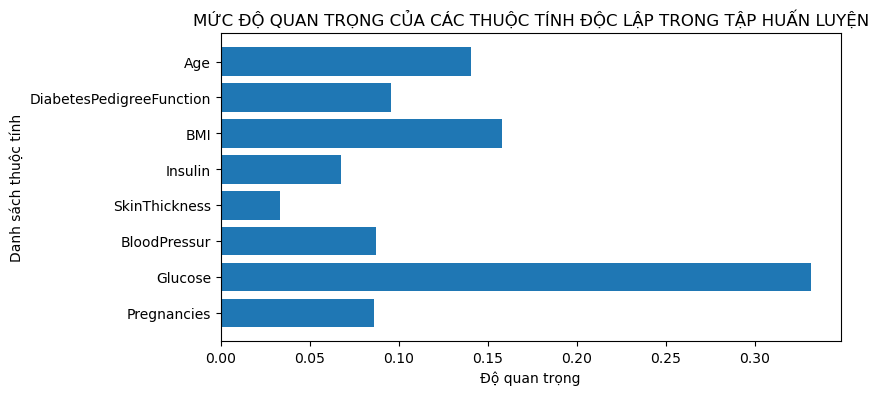

In [39]:
# Đặt tên cho các thuộc tính và target
feature_names = ['Pregnancies',
                'Glucose',
                'BloodPressur',
                'SkinThickness',
                'Insulin',
                'BMI',
                'DiabetesPedigreeFunction',
                'Age']
target_names = ['0: Không bị tiểu đường', '1: Bị tiểu đường']

print(feature_names)
print(Tree.feature_importances_)

# Trực quan hóa độ quan trọng của các thuộc tính độc lập trong tập huấn luyện
plt.figure(figsize=(8,4))
plt.barh(feature_names, Tree.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THUỘC TÍNH ĐỘC LẬP TRONG TẬP HUẤN LUYỆN')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.show()

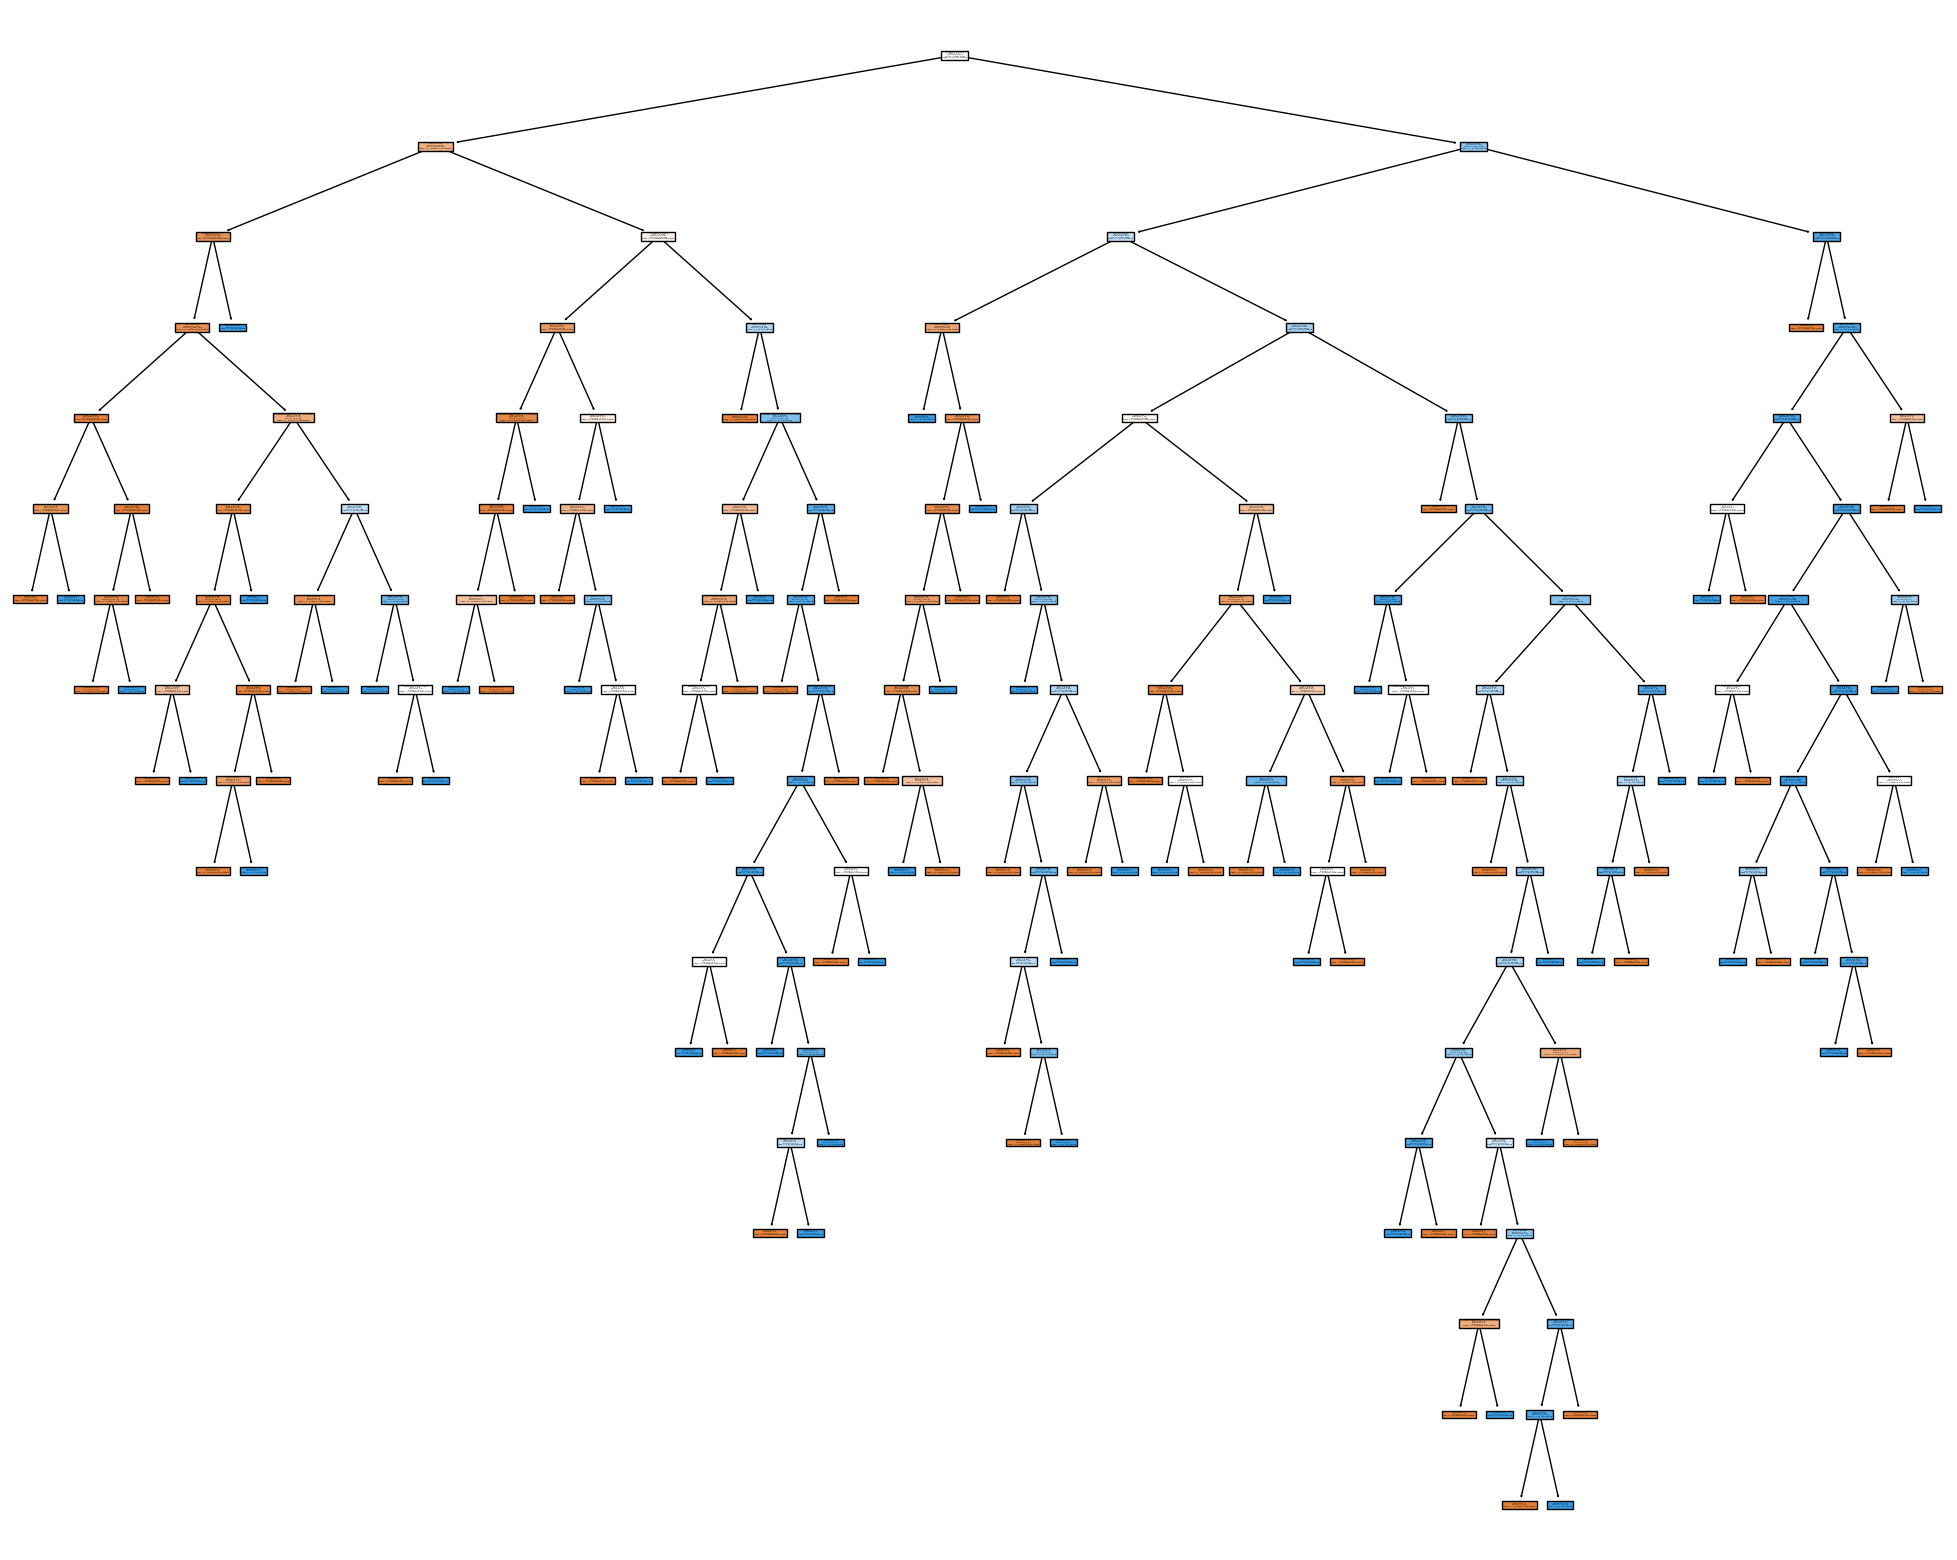

In [40]:
# Hiển thị cây quyết định
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

tree.plot_tree(Tree,
              feature_names=feature_names,
              class_names=target_names,
              filled=True)

plt.show()

#### <span style="color: red;">Độ chính xác của model (accuracy) trên tập Train – Test</span>

In [41]:
# Đánh giá độ chính xác trên mô hình huấn luyện:
acc_train_tree = Tree.score(X_train, y_train)
print('Độ chính xác trên tập huấn luyện: ', round(acc_train_tree*100, 2), '%')

Độ chính xác trên tập huấn luyện:  100.0 %


In [42]:
# Đánh giá độ chính xác trên mô hình tập test:
from sklearn.metrics import accuracy_score
y_pred_tree = Tree.predict(X_test)

acc_test_tree = accuracy_score(y_test, y_pred_tree, normalize=True)
print('Độ chính xác trên mô hình tập test: ', round(acc_test_tree*100, 2), '%')

Độ chính xác trên mô hình tập test:  81.87 %


#### <span style="color: red;">Tổng số mẫu dự đoán đúng - sai trên tập Test</span>

In [43]:
# Đếm số mẫu dự đoán đúng trên tập Test:
acc_test_tree = accuracy_score(y_test, y_pred_tree, normalize=False)

print('Tổng số mẫu dự đoán đúng: ', int(acc_test_tree), '/', len(y_test))
print('Tổng số mẫu dự đoán sai:', int(len(y_test) - acc_test_tree), '/', len(y_test))

Tổng số mẫu dự đoán đúng:  140 / 171
Tổng số mẫu dự đoán sai: 31 / 171


#### <span style="color: red;">Ma trận confusion matrix trên tập Test</span>

[[66 22]
 [ 9 74]]


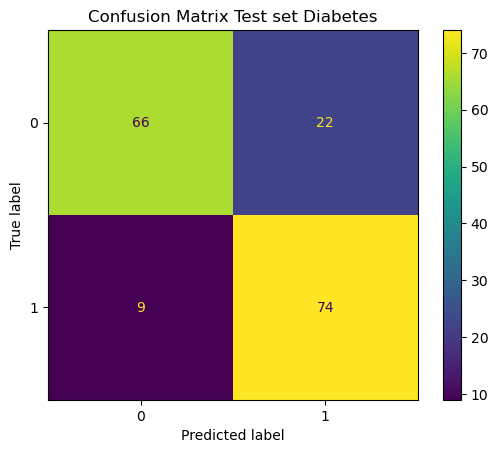

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tính ma trận confusion matrix
cnf_matrix_diabetes = confusion_matrix(y_test, y_pred_tree)
print(cnf_matrix_diabetes)

# Hiển thị ma trận
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
plt.title('Confusion Matrix Test set Diabetes')
plt.show()

**NHẬN XÉT:**
---
* Với model Decision Tree sau khi huấn luyện có Train - Test: 100% - 84.8% => Có thể đưa vào sử dụng

#### <span style="color: red;">d) Tìm hiểu và tính toán thông số F1-Score, Recall của model</span>

Để đánh giá hiệu suất mô hình phân loại, ta thường sử dụng các chỉ số như độ chính xác (accuracy), độ chính xác (precision), độ bao quát (recall), F1-score, v.v. Trong đó, F1-score và recall là hai chỉ số quan trọng để đánh giá hiệu quả của mô hình trong việc phân loại các lớp thiểu số.

### Precision
Precision (Độ chính xác) là một khái niệm trong đánh giá hiệu suất của một mô hình phân loại (classification model). Nó đo lường tỷ lệ các điểm dữ liệu thuộc lớp positive (positive class) được dự đoán đúng so với tổng số điểm dữ liệu được dự đoán là positive (bao gồm cả những điểm dữ liệu thực sự thuộc lớp positive và những điểm dữ liệu thuộc lớp negative bị dự đoán nhầm là positive)
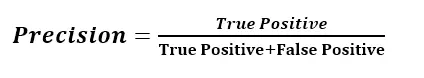

### Recall (Độ nhạy)

Recall (còn được gọi là Sensitivity, True Positive Rate) là tỷ lệ giữa số lượng các điểm dữ liệu thuộc lớp positive được dự đoán đúng (TP) và tổng số lượng các điểm thực sự thuộc lớp positive (TP + FN).
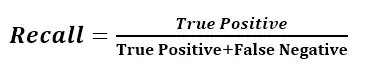

### F1-Score
F1 Score là trung bình điều hòa giữa precision và recall. Do đó nó đại diện hơn trong việc đánh gía độ chính xác trên đồng thời precision và recall.
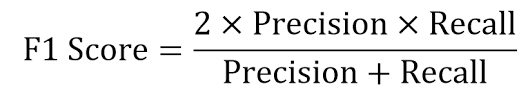

* TP (True Positive): Tổng số trường hợp dự báo khớp Positive.
* TN (True Negative): Tổng số trường hợp dự báo khớp Negative.
* FP (False Positive): Tổng số trường hợp dự báo các quan sát thuộc nhãn Negative thành Positive.
* FN (False Negative): Tổng số trường hợp dự báo các quan sát thuộc nhãn Positive thành Negative.

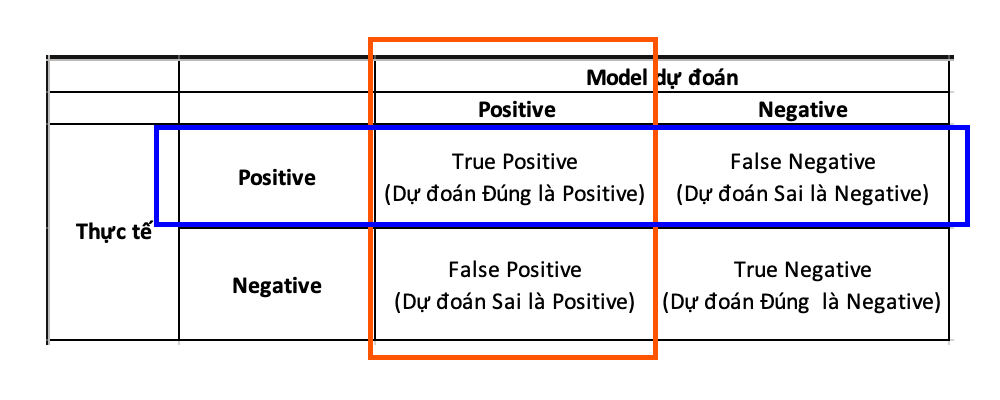

* Xây dựng hàm tính TP, TN, FP, FN

In [45]:
def calculate_confusion_matrix(y_true, y_pred, positive_label, negative_label):
    # Khởi tạo các biến đếm
    tp = 0  # True Positive
    tn = 0  # True Negative
    fp = 0  # False Positive
    fn = 0  # False Negative
    
    # Tính toán từng cặp dự đoán và nhãn thực tế
    for true, pred in zip(y_true, y_pred):
        if true == positive_label and pred == positive_label:
            tp += 1  # True Positive
        elif true == negative_label and pred == negative_label:
            tn += 1  # True Negative
        elif true == negative_label and pred == positive_label:
            fp += 1  # False Positive
        elif true == positive_label and pred == negative_label:
            fn += 1  # False Negative
    
    return tp, tn, fp, fn

# Ví dụ về cách sử dụng hàm tính toán confusion matrix
y_true = y_hybrid  # Nhãn thực tế
y_pred = Tree.predict(X_hybrid)  # Dự đoán của mô hình
positive_label = 1  # Nhãn của lớp tích cực
negative_label = 0  # Nhãn của lớp tiêu cực

# Tính toán confusion matrix
tp, tn, fp, fn = calculate_confusion_matrix(y_true, y_pred, positive_label, negative_label)

# In ra các giá trị
print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)


True Positive (TP): 417
True Negative (TN): 404
False Positive (FP): 22
False Negative (FN): 9


* Xây dựng hàm tính các thông số Recall và F1 Score

In [46]:
def calculate_recall(tp, fn):
    # Tính toán Recall (Tỉ lệ phát hiện)
    if tp + fn == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)
    return recall

def calculate_f1_score(tp, fp, fn):
    # Tính toán Precision
    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)
    
    # Tính toán Recall
    if tp + fn == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)
    
    # Tính toán F1 Score
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
    
    return f1_score

# Ví dụ về cách sử dụng các hàm tính Recall và F1 Score từ các thông số TP, FP, FN
tp = tp   # True Positive
fp = fp    # False Positive
fn = fn    # False Negative

# Tính toán Recall
recall = calculate_recall(tp, fn)
print("Recall (Tỉ lệ phát hiện):", round(recall,2))

# Tính toán F1 Score
f1_score = calculate_f1_score(tp, fp, fn)
print("F1 Score:", round(f1_score,2))


Recall (Tỉ lệ phát hiện): 0.98
F1 Score: 0.96


## 6. Sử dụng model xây dựng được, dự đoán Bệnh nhân với các thông số như sau có bị mắc bệnh tiểu đường hay không?
* Pregnancies: 0
* Glucose: 128
* BloodPressure: 78
* SkinThickness: 30
* Insulin: 138
* BMI: 30
* DiabetesPedigreeFunction: 1.18
* Age: 23

In [47]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
480,9,91,68,29.0,126.0,24.2,0.200,58,0
585,4,90,88,47.0,54.0,37.7,0.362,29,0
138,2,106,64,35.0,119.0,30.5,1.400,34,0
96,2,85,65,29.0,126.0,39.6,0.930,27,0
345,3,81,86,16.0,66.0,27.5,0.306,22,0


In [48]:
patient = np.array([[0, 128, 78, 30, 138, 30, 1.18, 23]])
print('Thông tin bệnh nhân:', patient)

Thông tin bệnh nhân: [[  0.   128.    78.    30.   138.    30.     1.18  23.  ]]


In [49]:
# Sử dụng mô hình đã huấn luyện kiểm tra xem bệnh nhân có mắc tiểu đường hay không?
patient_pred = Tree.predict(patient)
print(patient_pred)

# Kiểm tra
if(patient_pred == 0):
    print('ML said: Bệnh nhân không bị tiểu đường.')
else:
    print('ML said: Bệnh nhân đã bị tiểu đường!')
    

[0]
ML said: Bệnh nhân không bị tiểu đường.


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
